<a href="https://colab.research.google.com/github/afbassi8/Data-Science-projects/blob/main/Bolonha_%5BITA%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

###<center>Análise dos Dados do Airbnb - ***Bolonha - Itália***

<center><img width="50%" src="https://github.com/afbassi8/Data-Science-projects/blob/main/fonte-de-netuno-em-bolonha_469558-41358.webp?raw=true"></center>


**Bolonha** é uma cidade da italiana, capital da *Emilia-Romagna*, **fundada cerca de 500 anos antes de Cristo**. Apresenta uma bela arquitetura, com construções antigas e famosas, como a fonte de Netuno contruída no século XVI. 

Hoje é uma cidade com mais de 390 mil habitantes, ficando entre as 10 mais populosas da Itália. É conhecida como uma cidade cosmopolita e a universidade de Bolonha é a mais antiga da Europa, fundada em 1088. Dentre as cidades italianas é tida como **uma das melhores para morar por proporcionar grande qualidade de vida**.

A cidade é procurada por muitos turistas pela sua **beleza arquitetônica, história antiquíssima e excelente gastronomia**. Também é destino para estudantes da própria Itália e de vários países do mundo. 

Uma das formas de se hospedar em Bolonha, e passar dias bem agradáveis, é encontrar o imóvel ideal para você dentre as inúmeras opções no Airbnb, uma Startup fundada há pouco mais de 10 e que já ***hospedadou mais de 300 milhões de pessoas no mundo***.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste breve estudo mostraremos quais os tipos de imóveis disponíveis na cidade através do Airbnb, suas quantidades, preços médios, qual a região mais cara e como os imóveis estão distribuído no mapa da cidade.**

## Obtenção dos Dados


In [ ]:
# Importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
!pip install gmaps
import gmaps 
import gmaps.datasets 

In [ ]:
# Importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/listings.csv", index_col = "id")

## Análise dos Dados


**Dicionário das variáveis**

* `id`: número identificador do imóvel
* `name`: nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião) da propriedade
* `host_name`: nome do anfitrião
* `neighbourhood_group`: *coluna sem valores válidos
* `neighbourhood`: nome do bairro da propriedade anunciada
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da propriedade
* `room_type`: tipo de quarto que é oferecido
* `price`: preço para alugar o imóvel
* `minimum_nights`: quantidade mínima de noites para reservar
* `number_of_reviews`: número de reviews que a propriedade possui
* `last_review`: data do último review
* `reviews_per_month`: quantidade de reviews por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião
* `availability_365`: número de dias de disponibilidade dentro de 365 dias



Com os dados carregados, podemos listar as primeiras 5 entradas (linhas) e conhecer quais tipos de informações teremos para trabalhar.

In [ ]:
# Exibindo as 5 primeiras entradas do DataFrame
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
42196,50 sm Studio in the historic centre,184487,Carlo,NaN,Santo Stefano,44.48507,11.34786,Entire home/apt,71,3,195,2022-07-26,1.34,1,235,16,NaN
46352,A room in Pasolini's house,467810,Eleonora,NaN,Porto - Saragozza,44.49168,11.33514,Private room,31,1,331,2022-08-28,2.27,2,296,51,NaN
85368,Garden House Bologna,467675,Anna Maria,NaN,Santo Stefano,44.47834,11.35672,Entire home/apt,120,2,40,2019-11-03,0.31,1,351,0,NaN
125518,"quiet room, close to bus stop.",623988,Gabriella,NaN,Porto - Saragozza,44.47665,11.28085,Entire home/apt,75,7,21,2017-05-26,0.16,1,330,0,NaN
145779,SINGLE ROOM,705535,Valerio,NaN,Porto - Saragozza,44.49306,11.33786,Private room,70,7,71,2022-04-30,0.53,9,225,6,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# Identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

# Verificar os tipos de variáveis
display(df.dtypes)

Variáveis:	 17
Entradas:	 3895


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.940950
reviews_per_month                 0.108344
last_review                       0.108344
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
name                              0.000000
host_id                           0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

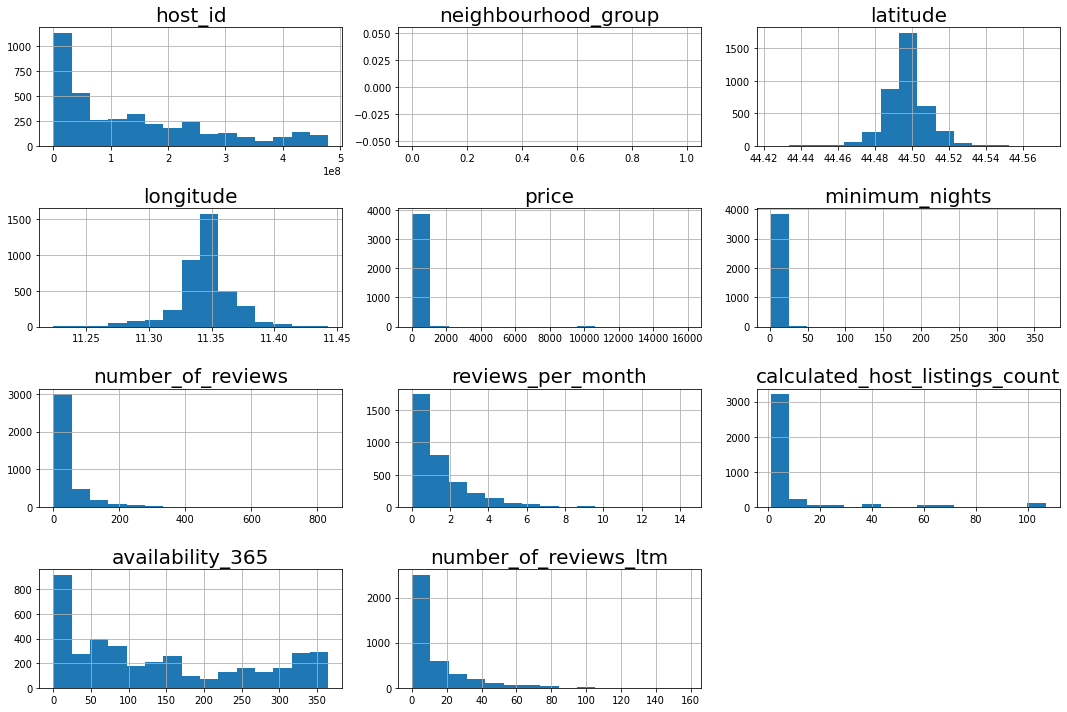

In [ ]:
# Plotar o histograma das variáveis numéricas
df.hist(bins= 15, figsize=(15,10));

### **Q4. Existem *outliers* no dados?**

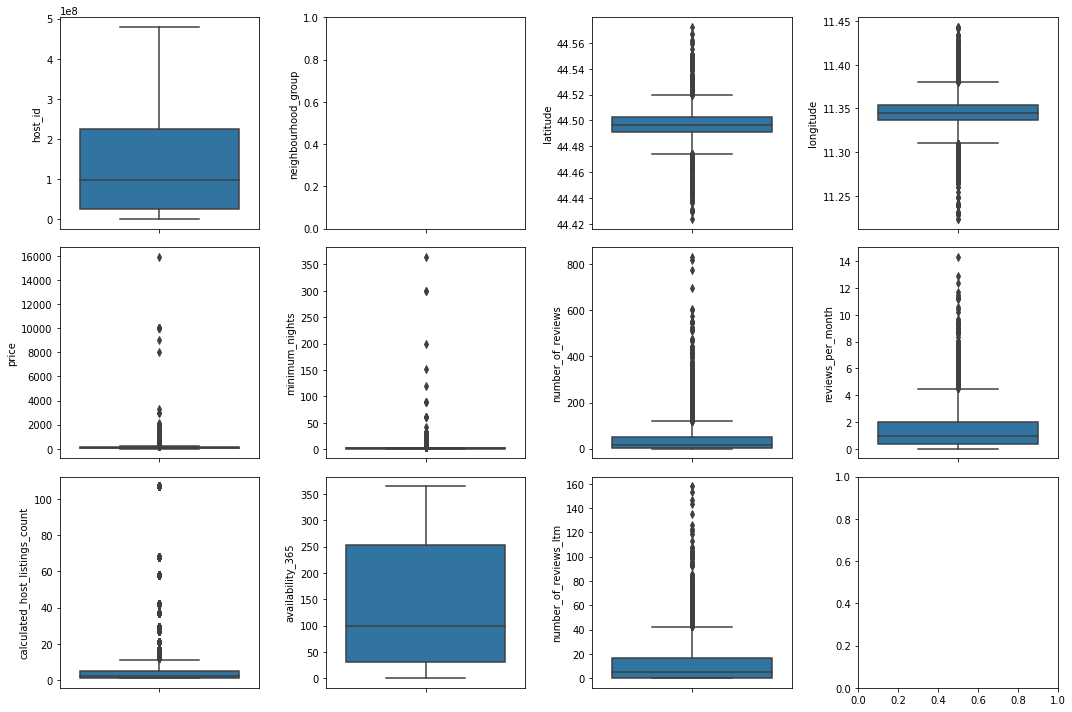

In [ ]:
# Gerando boxplot para todas as variávies
var_num = []
for i in df.columns[0:18].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            var_num.append(i)
     
plt.rcParams["figure.figsize"] = [15.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(3, 4) #5 linhas e 4 colunas

linha = 0
coluna = 0
for i in var_num:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

In [ ]:
# Obtenção dos principais dados estatísticos de todas as variáveis
df.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.895000e+03,0.0,3895.000000,3895.000000,3895.000000,3895.000000,3895.000000,3473.000000,3895.000000,3895.000000,3895.000000
mean,1.381718e+08,NaN,44.497066,11.344666,152.091913,2.797946,44.454942,1.493075,9.070347,138.186906,12.742490
std,1.333163e+08,NaN,0.013016,0.023145,549.596170,10.886160,76.017156,1.677773,20.682442,121.586472,18.687196
min,3.846800e+04,NaN,44.423600,11.223420,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.494923e+07,NaN,44.491345,11.336720,65.000000,1.000000,4.000000,0.340000,1.000000,31.000000,0.000000
50%,9.729894e+07,NaN,44.496670,11.345220,91.000000,2.000000,16.000000,0.960000,2.000000,100.000000,5.000000
75%,2.253562e+08,NaN,44.502710,11.354360,138.000000,2.000000,50.500000,2.000000,5.000000,254.000000,17.000000
max,4.792220e+08,NaN,44.572280,11.443290,15960.000000,365.000000,833.000000,14.360000,107.000000,365.000000,158.000000


**Análise de outliers por variável**

* `latitude e longitude`: embora os *boxplots* apontem valores de outliers, deve-se levar em conta que não se tratam de variáveis das quais é esperada uma distribuição normal em torno da média, são coordenadas geográficas em graus decimais. A latitude pode variar de 0° a 90° (norte / sul) e a longitude 0° a 180° (leste / oeste). Os valores máximos e mínimos obtidos pela função *describe* estão dentro desses limites. Uma rápida consulta no Google Maps mostra que de fato Bolonha está no quadrande de latitude 44° e longitude 11°.

* `price`: a variável price tem média 152 e possui 75% dos seus valores abaixo de 138. Porém seu valor máximo é 15960, confirmando a presença de *outliers*. Observando também o histograma fica evidente a concentração de valores na faixa 0 - 1000.

* `minimum_nights`: essa variável apresenta valores altos, alguns até maiores que 100 dias. Como se trata da quantidade mínima para locação, não faz sentido valores tão altos. Sendo assim, valores acima de 30 dias serão tratados como *outliers*.

Realizada a análise de *outliers* nas variáveis de intersse para este estudo, vamos seguir com o tratamento desses dados.

In [ ]:
# Verificando o percentual de entradas maiores que 1000 para a variável "price"
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

0.6675%


In [ ]:
# Verificando o percentual de entradas maiores que 30 para a variável "minimum_nights"
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

0.5392%


Nota-se que para ambas variáveis a quantidade de outliers representa um percentual muito pequeno dos dados, menos de 1%. Portanto, a excclusão desses *outliers* não perjudicará estatisticamente a análise.

**Excluindo *outliers* e plotando novos histogramas**

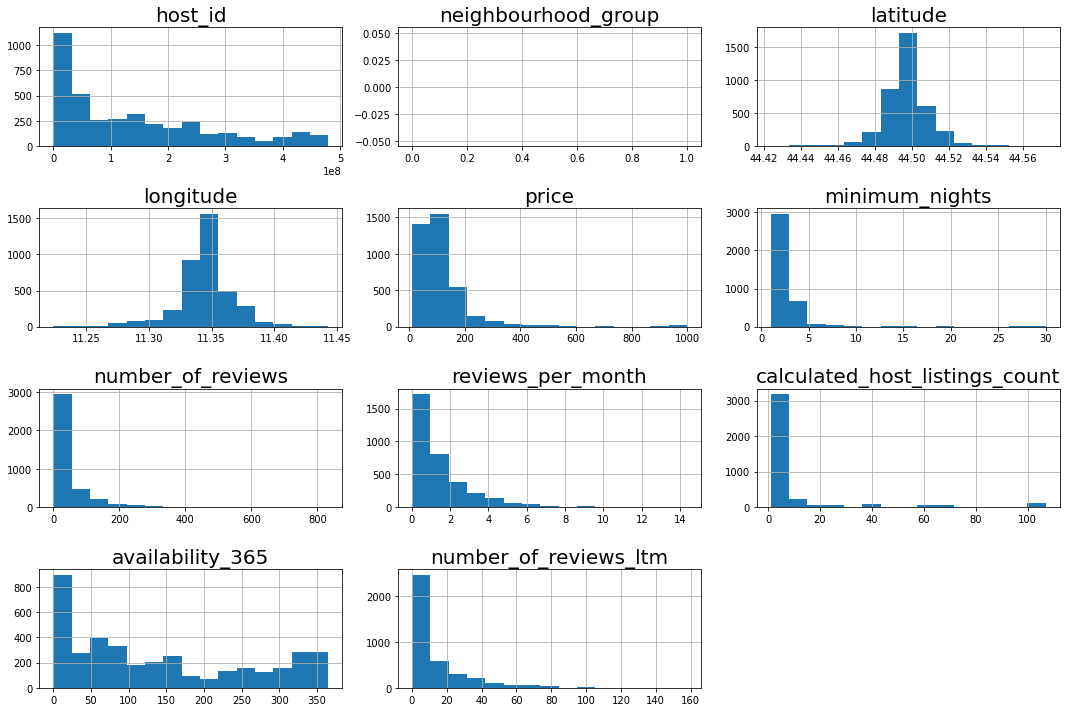

In [ ]:
# Gerando um novo DataFrame a partir do arquivo original e gerando novos histogramas
df_new = df.copy()
df_new.drop(df_new[df_new.price > 1000].index, axis = 0, inplace = True)
df_new.drop(df_new[df_new.minimum_nights > 30].index, axis = 0, inplace = True)
df_new.hist(bins= 15, figsize=(15,10));

É possível notar nos novos histogramas de *price* e *minimum_nigths* uma melhor distribuição dos dados, embora ainda deslocada para a esquerda. Esse comportamento é esperado dado que presumi-se que seja menor a quantidade de imóveis com valores altos para preços e número mínimo de noites.

### **Q5. Qual a média dos preços de aluguel?**

In [67]:
# Calculando a média dos preços sem outliers
print("Média de preços com outliers:\t {}".format(df.price.mean()))
print("Média de preços sem outliers:\t {}".format(df_new.price.mean()))

Média de preços com outliers:	 152.09191270860077
Média de preços sem outliers:	 118.11798336798337


### **Q6. Qual a correlação existente entre as variáveis**

In [ ]:
# Criando uma matriz de correlação
corr = df_new[['latitude',	'longitude',	'price',	'minimum_nights',	'number_of_reviews',
               'number_of_reviews_ltm']].corr()
display(corr)

,latitude,longitude,price,minimum_nights,number_of_reviews,number_of_reviews_ltm
latitude,1.000000,-0.163361,0.014468,-0.002991,-0.003529,0.008832
longitude,-0.163361,1.000000,0.012311,-0.010176,-0.029815,-0.020202
price,0.014468,0.012311,1.000000,-0.065870,-0.118179,-0.107248
minimum_nights,-0.002991,-0.010176,-0.065870,1.000000,-0.038585,-0.113292
number_of_reviews,-0.003529,-0.029815,-0.118179,-0.038585,1.000000,0.669165
number_of_reviews_ltm,0.008832,-0.020202,-0.107248,-0.113292,0.669165,1.000000


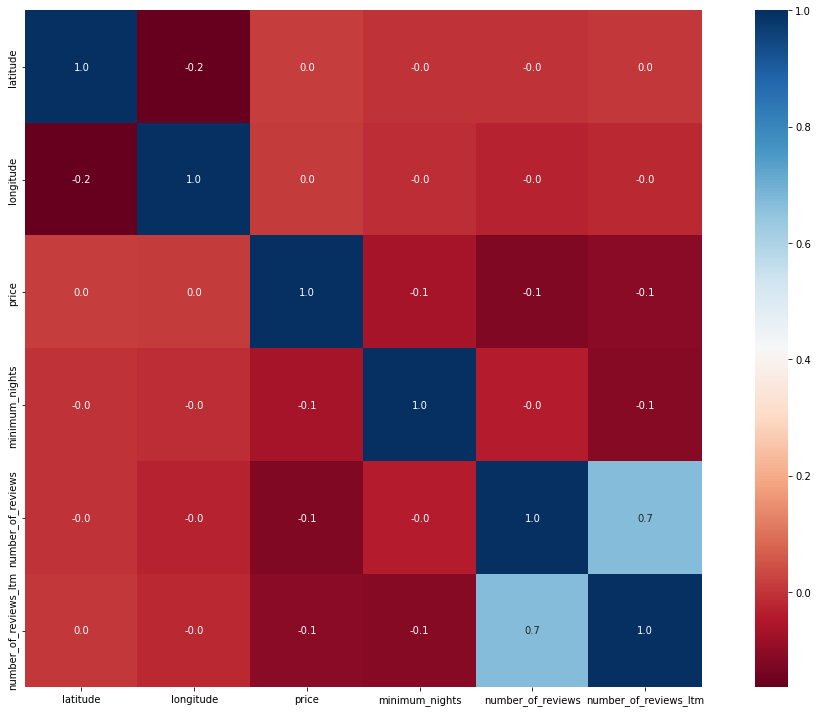

In [ ]:
# Plotando heatmap a partir das correlações
sns.heatmap(corr, cmap = "RdBu", fmt = ".1f", square = True, linecolor = "white", annot = True);

#### **Não foi identifica correlação forte entre as variáveis analisadas.**

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável *room_type* mostra os tipos de imóveis/acomodações oferecidas. Vamos listá-las e extrair a quantidade absoluta e o percentual por tipo.

In [ ]:
# Mostrar a quantidade de cada tipo de imóvel disponível
df_new.room_type.value_counts()

Entire home/apt    2759
Private room       1018
Hotel room           39
Shared room          32
Name: room_type, dtype: int64

In [ ]:
# Mostrar a porcentagem de cada tipo de imóvel disponível
df_new.room_type.value_counts()/df_new.shape[0]

Entire home/apt    0.716996
Private room       0.264553
Hotel room         0.010135
Shared room        0.008316
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [ ]:
# Ver média de preços por bairro
df_new.groupby("neighbourhood").agg({"price" : "mean"})

,price
neighbourhood,
Borgo Panigale - Reno,90.111702
Navile,112.238307
Porto - Saragozza,122.471055
San Donato - San Vitale,111.766180
Santo Stefano,127.721752
Savena,76.729412


In [ ]:
# Obter a quantidade de imóveis por bairro
df_new.neighbourhood.value_counts()

Santo Stefano              1301
Porto - Saragozza          1261
San Donato - San Vitale     479
Navile                      449
Borgo Panigale - Reno       188
Savena                      170
Name: neighbourhood, dtype: int64

In [54]:
# Plotando mapa de calor com referência aos preços dos imóveis para locação
heatmap_data = {'price': df_new.price, 'latitude': df_new.latitude, 'longitude' : df_new.longitude} 
df_plot = pd.DataFrame(data=heatmap_data)
locations = df_plot[['latitude', 'longitude']] 
weights = df_plot['price'] 
fig = gmaps.figure() 
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(height='420px'))

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [65]:
# Obtendo a média de noite mínimas para locação ("minimum_nights").
print("Média de noites mínimas para locação:\t {}".format(df_new.minimum_nights.mean()))

Média de noites mínimas para locação:	 2.2484407484407485


## Conclusões


A maioria dos imóvies ofertados pelo Airbnb em Bolonha (mais de 70%) é do tipo casa ou apartamento. Isto significa que há grande oferta de estadias que oferecem mais **privacidade e independência para o hóspede**.

Analisando o valor de locação, após correção do DataFrame com exclusão de outliers, foi obtido **valor médio de 118.11 por noite**. Na comparação entre bairros não é percebida grande diferença, princiapalmente dentre os mais caros. A região mais onerosa é a do bairro **Santo Stefano, com média de 127.7**. Este é também o bairro com maior quantidade de imóveis disponíveis, **são 1301 opções**.

Não foi encontrada correlação forte entre as variáveis analisadas. Isto significa que não há um padrão que explique, por exemplo, o comportamento da  variação sistemática de preços em relação à uma localidade ou a um anfitrição.

Em média, para os imóveis disponíveis no Airbnb na cidade de Bolonha, é solicitado o **mínimo de três noites** para reserva.

Através do mapa de calor, onde as cores mais quentes indicam preços mais altos, é possível ter a visão da distribuição geográfica dos imóveis e as regiões mais caras, embora, como dito anteriormente, não foi observada grande variação na média de preços por bairro.